## analise de dados da copa do mundo
com base ma ágina spbre a copa do mundo na wikipedia vamos obter os dados de publico pagante em cada final.(raspagem de dados)
link: https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA

In [24]:
import pandas as pd
import requests as rq

url = 'https://pt.wikipedia.org/wiki/Copa_do_Mundo_FIFA'
resposta = rq.get(url)

#obter a resposta em formato HTML
table = pd.read_html(resposta.text)

#por padrao do pandas, ele transformara as tabelas encontradas nas paginas html em dataframe automaticamente

In [25]:
#selecionando apenas o queé desejado na pagina

#tabela com o n° de pagantes nas finas -> nesse caso 12° tabela
#fazer com que o df seja  apenas a parte que sera selecionada(12° tabela)
df = table[11]
df.head()

,Edição,Ano,Estádio,Local,Público pagante
0,I,1930,Estádio Centenário,Montevidéu,68.346
1,II,1934,Estádio do Partido Nacional Fascista,Roma,55.000
2,III,1938,Estádio Olímpico Yves-du-Manoir,Colombes,45.000
3,IV,1950,Estádio do Maracanã,Rio de Janeiro,173.850
4,V,1954,Estádio Wankdorf,Berna,62.500


In [27]:
#mudar o nome das colunas usando a primeira linha -> aqui não precisou, mas vai que...
"""
df.columns = df.iloc[0]

#apagando a primeira linha inteira
#dataframe.drop(dataframeindex[index], inplace=True) -> inplace: fazer com que seja executado a exclusão na linha do notebook, modificando o df original

df.drop(df.index[0], inplace=True)
df.head
"""

'\ndf.columns = df.iloc[0]\n\n#apagando a primeira linha inteira\n#dataframe.drop(dataframeindex[index], inplace=True) -> inplace: fazer com que seja executado a exclusão na linha do notebook, modificando o df original\n\ndf.drop(df.index[0], inplace=True)\ndf.head\n'

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Edição           21 non-null     object 
 1   Ano              21 non-null     int64  
 2   Estádio          21 non-null     object 
 3   Local            21 non-null     object 
 4   Público pagante  21 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 968.0+ bytes


In [31]:
#convetendo tipo de valores
#conveter publico pagante para inteiro

df['Público pagante'] = df['Público pagante'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Edição           21 non-null     object
 1   Ano              21 non-null     int64 
 2   Estádio          21 non-null     object
 3   Local            21 non-null     object
 4   Público pagante  21 non-null     int32 
dtypes: int32(1), int64(1), object(3)
memory usage: 884.0+ bytes


### construir um grafico com a evloução do publico pagante
- usando seaborn e matplotlib

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

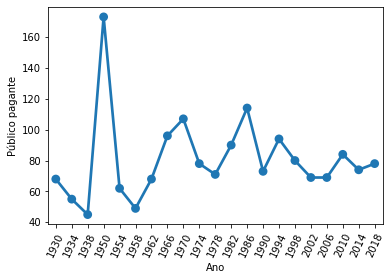

In [39]:
#sns.pointplot(x='coluna para o eixo x', y='coluna para o eixo y', data=dataframe)
sns.pointplot(x='Ano', y='Público pagante', data=df)

#ajustar legenda -> rotação
plt.xticks(rotation=65)
plt.show()